# Objective - 1

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Lato'

In [2]:
# Import the data from both tabs in the "Bank_Churn_Messy" Excel file.
cust_df = pd.read_excel('Bank_Churn_Messy.xlsx', sheet_name = 0)
accn_df = pd.read_excel('Bank_Churn_Messy.xlsx', sheet_name = 1)

In [3]:
cust_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88
1,15647311,Hill,608,Spain,Female,41.0,1,€112542.58
2,15619304,Onio,502,French,Female,42.0,8,€113931.57
3,15701354,Boni,699,FRA,Female,39.0,1,€93826.63
4,15737888,Mitchell,850,Spain,Female,43.0,2,€79084.1


In [4]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10001 non-null  int64  
 1   Surname          9998 non-null   object 
 2   CreditScore      10001 non-null  int64  
 3   Geography        10001 non-null  object 
 4   Gender           10001 non-null  object 
 5   Age              9998 non-null   float64
 6   Tenure           10001 non-null  int64  
 7   EstimatedSalary  10001 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 625.2+ KB


In [5]:
cust_df.isna().sum()

CustomerId         0
Surname            3
CreditScore        0
Geography          0
Gender             0
Age                3
Tenure             0
EstimatedSalary    0
dtype: int64

In [6]:
accn_df.head()

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited
0,15634602,€0.0,1,Yes,2,Yes,1
1,15634602,€0.0,1,Yes,2,Yes,1
2,15647311,€83807.86,1,Yes,1,Yes,0
3,15619304,€159660.8,3,No,8,No,1
4,15701354,€0.0,2,No,1,No,0


In [7]:
accn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerId      10002 non-null  int64 
 1   Balance         10002 non-null  object
 2   NumOfProducts   10002 non-null  int64 
 3   HasCrCard       10002 non-null  object
 4   Tenure          10002 non-null  int64 
 5   IsActiveMember  10002 non-null  object
 6   Exited          10002 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 547.1+ KB


In [8]:
accn_df.isna().sum()

CustomerId        0
Balance           0
NumOfProducts     0
HasCrCard         0
Tenure            0
IsActiveMember    0
Exited            0
dtype: int64

In [9]:
# Use a left join to join "Account_Info" to "Customer_Info" using the CustomerID column.
bank_df = \
(
    cust_df
    .merge(accn_df, how = 'left', on = 'CustomerId')
    .drop(['Tenure_y'], axis = 1)
    .rename({'Tenure_x' : 'Tenure'}, axis = 1)
).drop_duplicates()
bank_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,€112542.58,€83807.86,1,Yes,Yes,0
3,15619304,Onio,502,French,Female,42.0,8,€113931.57,€159660.8,3,No,No,1
4,15701354,Boni,699,FRA,Female,39.0,1,€93826.63,€0.0,2,No,No,0
5,15737888,Mitchell,850,Spain,Female,43.0,2,€79084.1,€125510.82,1,Yes,Yes,0


In [10]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          9997 non-null   object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              9997 non-null   float64
 6   Tenure           10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  object 
 8   Balance          10000 non-null  object 
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  object 
 11  IsActiveMember   10000 non-null  object 
 12  Exited           10000 non-null  int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 1.1+ MB


# Objective - 2

In [11]:
# Check the data types for each column and make any necessary fixes.
bank_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,€112542.58,€83807.86,1,Yes,Yes,0
3,15619304,Onio,502,French,Female,42.0,8,€113931.57,€159660.8,3,No,No,1
4,15701354,Boni,699,FRA,Female,39.0,1,€93826.63,€0.0,2,No,No,0
5,15737888,Mitchell,850,Spain,Female,43.0,2,€79084.1,€125510.82,1,Yes,Yes,0


In [12]:
bank_df[['EstimatedSalary', 'Balance']] = (
    bank_df[['EstimatedSalary', 'Balance']]
    .apply(
        lambda x: x.str.replace('€', '').astype(float)
    )
)
bank_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,101348.88,0.00,1,Yes,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,112542.58,83807.86,1,Yes,Yes,0
3,15619304,Onio,502,French,Female,42.0,8,113931.57,159660.80,3,No,No,1
4,15701354,Boni,699,FRA,Female,39.0,1,93826.63,0.00,2,No,No,0
5,15737888,Mitchell,850,Spain,Female,43.0,2,79084.10,125510.82,1,Yes,Yes,0


In [13]:
# Replace missing values in categorical columns with "MISSING", and missing values in numeric columns with the median.
bank_df.isna().sum()

CustomerId         0
Surname            3
CreditScore        0
Geography          0
Gender             0
Age                3
Tenure             0
EstimatedSalary    0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
Exited             0
dtype: int64

In [14]:
bank_df[bank_df.isna().any(axis=1) == True]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
29,15728693,NaN,574,Germany,Female,NaN,3,-999999.0,141349.43,1,Yes,Yes,0
122,15580203,NaN,674,Spain,Male,NaN,6,-999999.0,120193.42,1,No,No,0
9390,15756954,NaN,538,France,Female,NaN,2,-999999.0,0.00,1,Yes,Yes,0


In [15]:
bank_df = bank_df.fillna(value={'Surname' : 'MISSING', 'Age' : bank_df['Age'].median()})
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  float64
 6   Tenure           10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  object 
 11  IsActiveMember   10000 non-null  object 
 12  Exited           10000 non-null  int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 1.1+ MB


In [16]:
# Profile the numeric columns in the data. Are there any extreme or non-sensical values? If so, impute them with the median of the column.
bank_df.describe()

,CustomerId,CreditScore,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921500,5.012800,99762.195289,76485.889288,1.530200,0.203700
std,7.193619e+04,96.653299,10.487552,2.892174,60583.863580,62397.405202,0.581654,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,-999999.000000,0.000000,1.000000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,50910.677500,0.000000,1.000000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,100191.725000,97198.540000,1.000000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,149388.247500,127644.240000,2.000000,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,199992.480000,250898.090000,4.000000,1.000000


In [17]:
bank_df.query("EstimatedSalary < 0")

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
29,15728693,MISSING,574,Germany,Female,37.0,3,-999999.0,141349.43,1,Yes,Yes,0
122,15580203,MISSING,674,Spain,Male,37.0,6,-999999.0,120193.42,1,No,No,0
9390,15756954,MISSING,538,France,Female,37.0,2,-999999.0,0.00,1,Yes,Yes,0


In [18]:
bank_df['EstimatedSalary'] = bank_df['EstimatedSalary'].replace(-999999, bank_df['EstimatedSalary'].median())
bank_df.describe()

,CustomerId,CreditScore,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921500,5.012800,100092.252506,76485.889288,1.530200,0.203700
std,7.193619e+04,96.653299,10.487552,2.892174,57510.146401,62397.405202,0.581654,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,11.580000,0.000000,1.000000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,51002.110000,0.000000,1.000000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,100196.062500,97198.540000,1.000000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,149388.247500,127644.240000,2.000000,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,199992.480000,250898.090000,4.000000,1.000000


In [19]:
# Combine any variations in country names in the "Geography" column to a single value per country.
bank_df['Geography'].value_counts()

Geography
Germany    2509
Spain      2477
France     1741
French     1655
FRA        1618
Name: count, dtype: int64

In [20]:
bank_df['Geography'] = np.where(bank_df['Geography'].isin(['FRA', 'French', 'France']), 'France', bank_df['Geography'])
bank_df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

# Objective - 3

In [21]:
# Define the folder path
folder_path = 'plots'

# Check if the folder exists, and create it if it doesn't
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
    print(f"Folder '{folder_path}' created.")
else:
    print(f"Folder '{folder_path}' already exists.")


Folder 'plots' already exists.


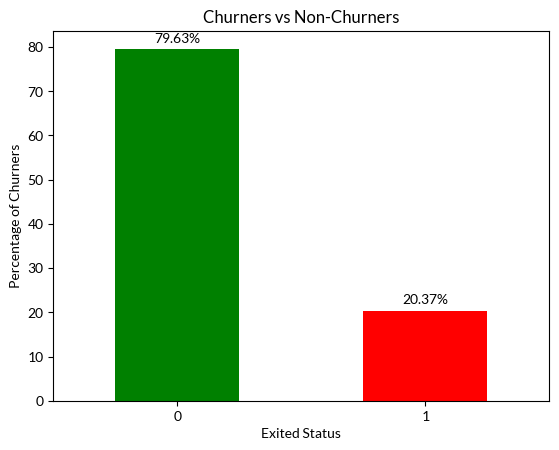

In [22]:
# Build a bar chart displaying the count of churners (Exited=1) vs. non-churners (Exited=0).

# Calculate normalized value counts (as percentages)
value_counts = bank_df['Exited'].value_counts(normalize=True) * 100  # Convert to percentages

# Define colors for each status (e.g., color 0 as green and 1 as red)
colors = ['green' if status == 0 else 'red' for status in value_counts.index]

# Plot the bar chart
ax = value_counts.plot(kind='bar', color=colors)

# Set title, x and y labels
ax.set_title('Churners vs Non-Churners')
ax.set_xlabel('Exited Status')
ax.set_ylabel('Percentage of Churners')

# Set tick positions and labels, and keep them horizontal
ax.set_xticks(range(len(value_counts)))
ax.set_xticklabels(value_counts.index, rotation=0)

# Add data labels (formatted as percentages) on top of each bar
for index, value in enumerate(value_counts):
    ax.text(index, value + 1, f"{value:.2f}%", ha='center', va='bottom')  # Adjust label position

# Save & show the plot
plt.savefig('plots/churners_bar.png', dpi=300, bbox_inches='tight')
plt.show()

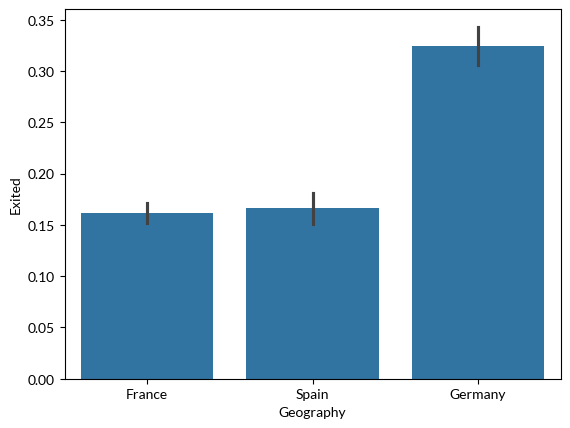

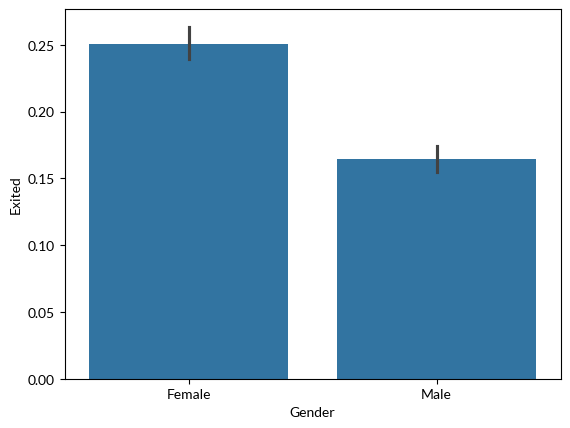

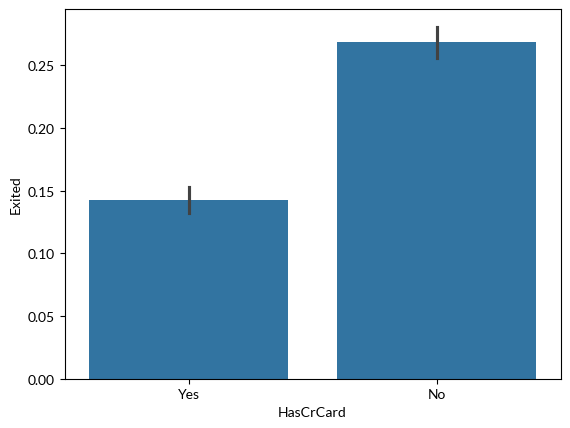

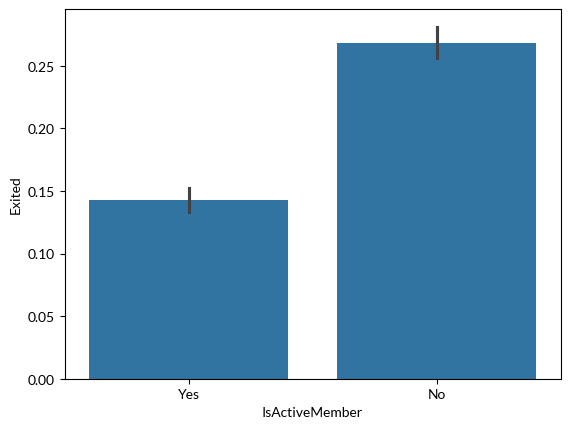

In [23]:
# Explore the categorical variables vs. the target, and look at the percentage of Churners by “Geography” and “Gender”.

# Loop through each categorical column and plot
for col in bank_df.drop('Surname', axis=1).select_dtypes('object'):
    # Create a bar plot
    plt.figure()  # Initialize a new figure for each plot
    sns.barplot(data=bank_df, x=col, y='Exited')
    
    # Save the plot with a unique filename based on the column name
    plt.savefig(f"plots/{col.lower()}Exited_bar.png", dpi=300, bbox_inches='tight')
    
    # Display the plot
    plt.show()

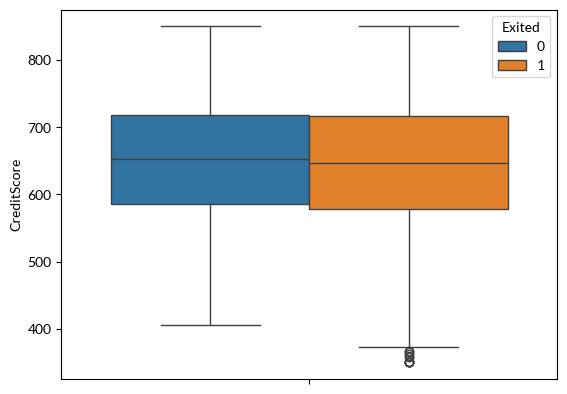

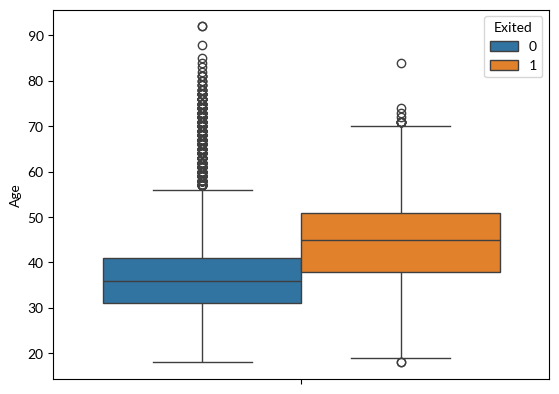

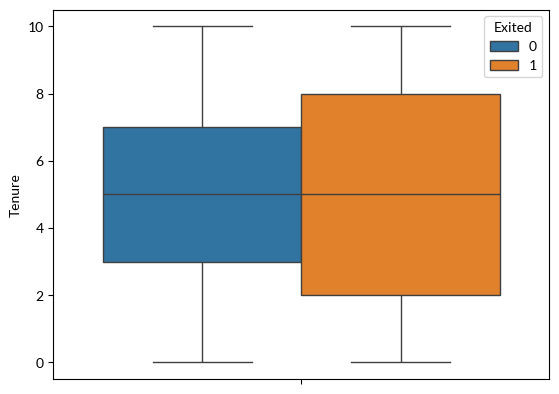

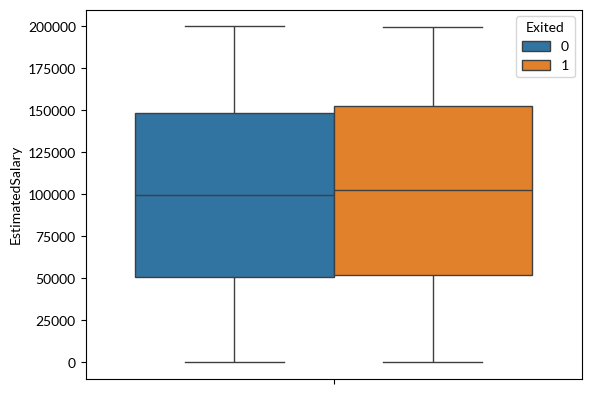

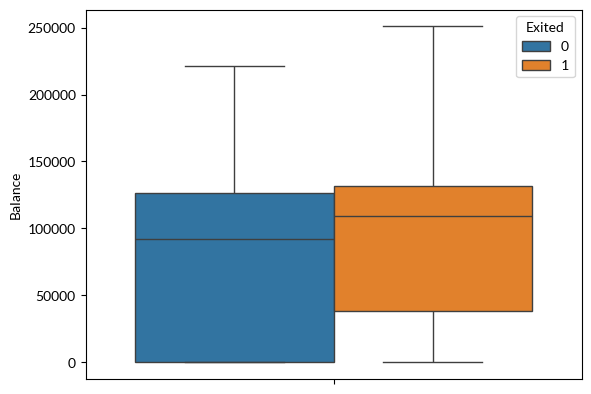

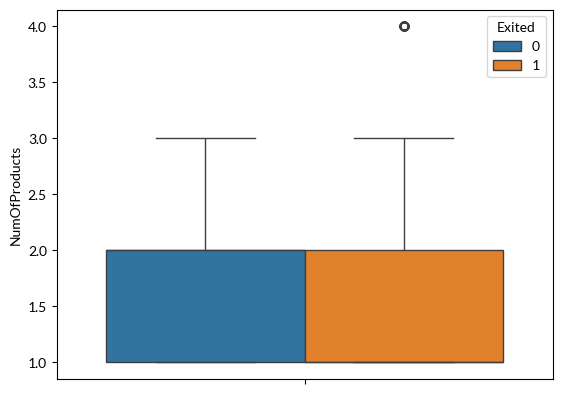

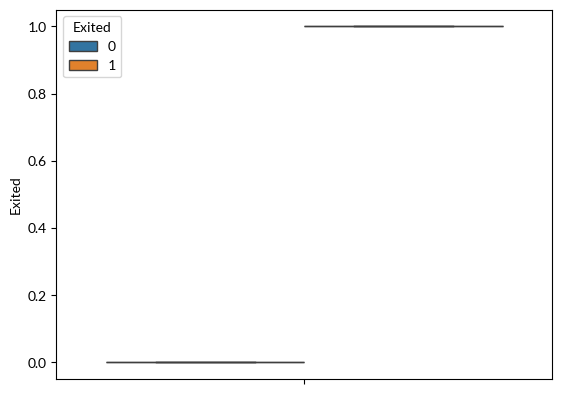

In [24]:
# Build box plots for each numeric field, broken out by churners vs. non-churners.
for col in bank_df.drop('CustomerId', axis=1).select_dtypes('number'):
    # Create a bar plot
    plt.figure()  # Initialize a new figure for each plot
    sns.boxplot(data=bank_df, y = col, hue='Exited')
    
    # Save the plot with a unique filename based on the column name
    plt.savefig(f"plots/{col.lower()}Exited_box.png", dpi=300, bbox_inches='tight')
    
    # Display the plot
    plt.show()

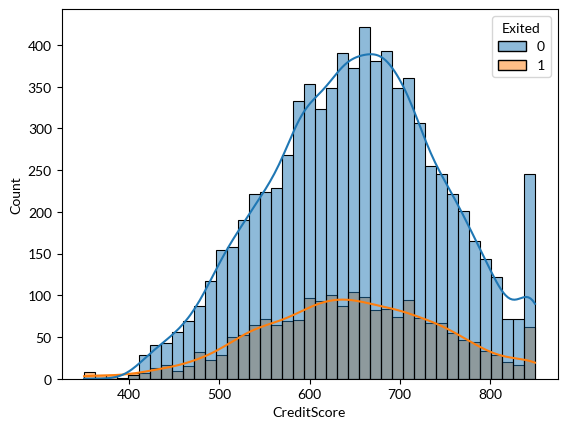

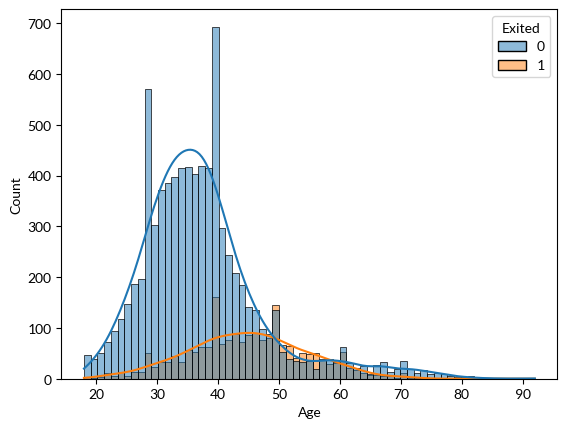

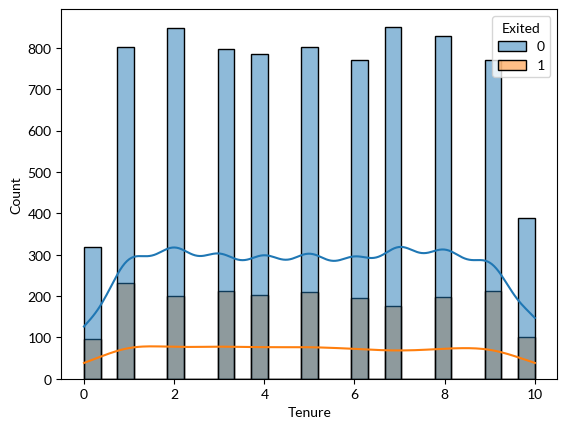

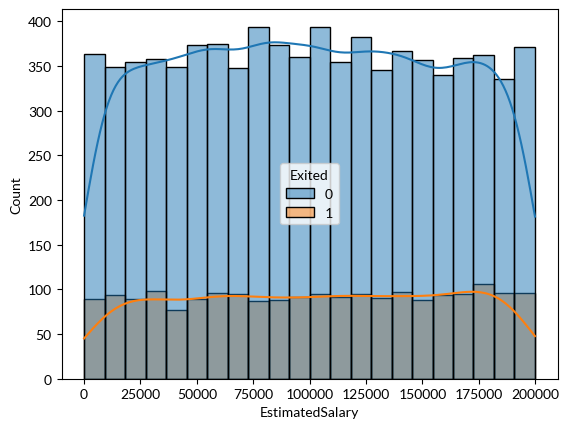

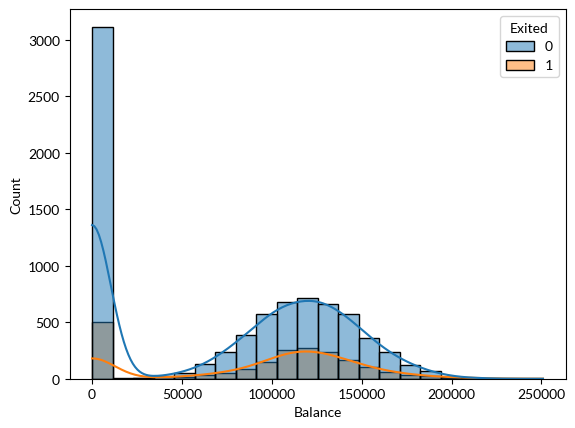

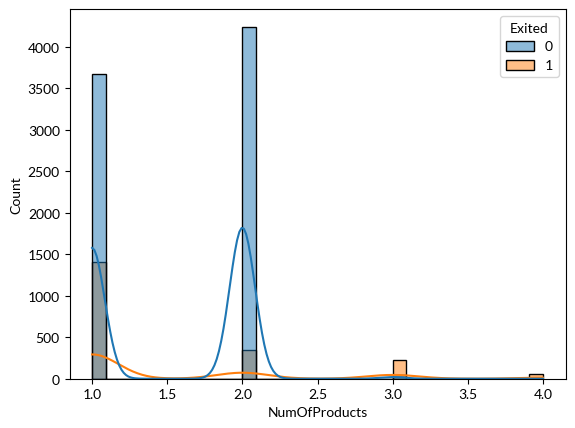

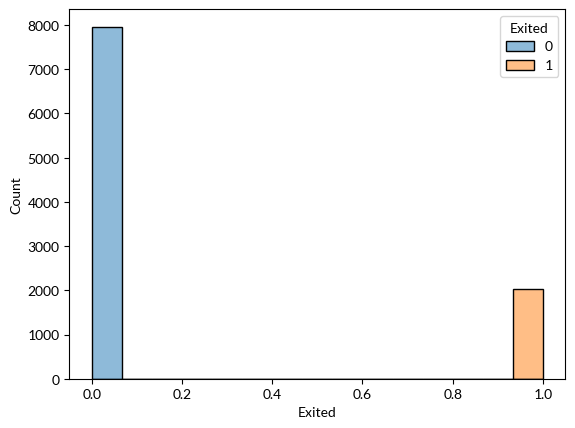

In [25]:
# Build histograms for each numeric field, broken out by churners vs. non-churners.
for col in bank_df.drop('CustomerId', axis=1).select_dtypes('number'):
    # Create a bar plot
    plt.figure()  # Initialize a new figure for each plot
    sns.histplot(data=bank_df, x = col, hue='Exited', kde = True)
    
    # Save the plot with a unique filename based on the column name
    plt.savefig(f"plots/{col.lower()}Exited_hist.png", dpi=300, bbox_inches='tight')
    
    # Display the plot
    plt.show()

# Objective - 4

In [26]:
bank_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,Hargrave,619,France,Female,42.0,2,101348.88,0.00,1,Yes,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,112542.58,83807.86,1,Yes,Yes,0
3,15619304,Onio,502,France,Female,42.0,8,113931.57,159660.80,3,No,No,1
4,15701354,Boni,699,France,Female,39.0,1,93826.63,0.00,2,No,No,0
5,15737888,Mitchell,850,Spain,Female,43.0,2,79084.10,125510.82,1,Yes,Yes,0


In [27]:
# Create a new dataset that excludes any columns that aren’t be suitable for modeling.
model_df = bank_df.drop(['CustomerId', 'Surname'], axis = 1)
model_df.head()

,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,619,France,Female,42.0,2,101348.88,0.00,1,Yes,Yes,1
2,608,Spain,Female,41.0,1,112542.58,83807.86,1,Yes,Yes,0
3,502,France,Female,42.0,8,113931.57,159660.80,3,No,No,1
4,699,France,Female,39.0,1,93826.63,0.00,2,No,No,0
5,850,Spain,Female,43.0,2,79084.10,125510.82,1,Yes,Yes,0


In [28]:
# Create dummy variables for categorical fields.
model_df = pd.get_dummies(model_df, drop_first=True)
model_df.head()

,CreditScore,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,Exited,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard_Yes,IsActiveMember_Yes
0,619,42.0,2,101348.88,0.00,1,1,False,False,False,True,True
2,608,41.0,1,112542.58,83807.86,1,0,False,True,False,True,True
3,502,42.0,8,113931.57,159660.80,3,1,False,False,False,False,False
4,699,39.0,1,93826.63,0.00,2,0,False,False,False,False,False
5,850,43.0,2,79084.10,125510.82,1,0,False,True,False,True,True


In [29]:
# Create a new “balance_v_income” feature, which divides a customer’s bank balance by their estimated salary, then visualize that feature vs. churn status.
model_df['Balance_v_Sal'] = model_df['Balance'] / model_df['EstimatedSalary']
model_df.head()

,CreditScore,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,Exited,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard_Yes,IsActiveMember_Yes,Balance_v_Sal
0,619,42.0,2,101348.88,0.00,1,1,False,False,False,True,True,0.000000
2,608,41.0,1,112542.58,83807.86,1,0,False,True,False,True,True,0.744677
3,502,42.0,8,113931.57,159660.80,3,1,False,False,False,False,False,1.401375
4,699,39.0,1,93826.63,0.00,2,0,False,False,False,False,False,0.000000
5,850,43.0,2,79084.10,125510.82,1,0,False,True,False,True,True,1.587055


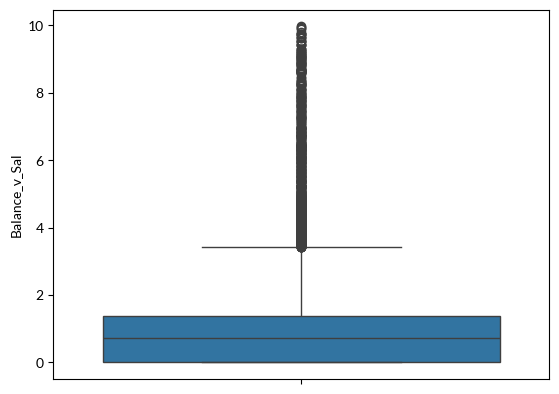

In [30]:
sns.boxplot(data = model_df.query('Balance_v_Sal < 10'), y = 'Balance_v_Sal')
plt.savefig('plots/bvs_barplot.png', dpi=300, bbox_inches='tight')
plt.show()

In [31]:
model_df.describe()

,CreditScore,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,Exited,Balance_v_Sal
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921500,5.012800,100092.252506,76485.889288,1.530200,0.203700,3.878703
std,96.653299,10.487552,2.892174,57510.146401,62397.405202,0.581654,0.402769,108.337260
min,350.000000,18.000000,0.000000,11.580000,0.000000,1.000000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,51002.110000,0.000000,1.000000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,100196.062500,97198.540000,1.000000,0.000000,0.747002
75%,718.000000,44.000000,7.000000,149388.247500,127644.240000,2.000000,0.000000,1.514022
max,850.000000,92.000000,10.000000,199992.480000,250898.090000,4.000000,1.000000,10614.655440


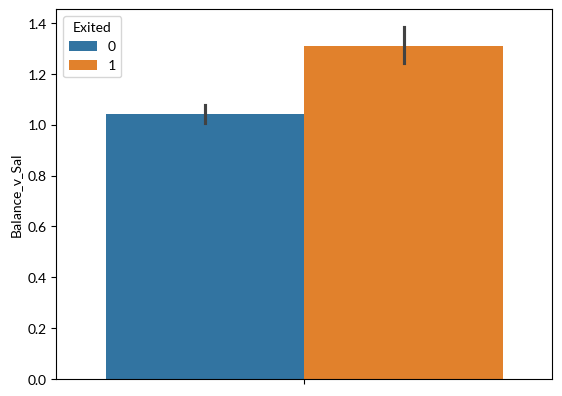

In [32]:
sns.barplot(data = model_df.query('Balance_v_Sal < 10'), y = 'Balance_v_Sal', hue = 'Exited')
plt.savefig('plots/bvsExited_bar.png', dpi=300, bbox_inches='tight')
plt.show()